# Imports

In [3]:
import pandas as pd
import numpy as np
import rasterio
import geopandas as gpd
import earthpy.plot as ep
import os
import imageio
import cv2
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import glob
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import cv2
keras.utils.set_random_seed(101)
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0

# Path

In [4]:
os.getcwd()

'c:\\Users\\Rehan Ibrahim\\OneDrive - HEC Paris\\Desktop\\mckinsey-methane-hackathon\\notebooks'

In [5]:
cd ..

c:\Users\Rehan Ibrahim\OneDrive - HEC Paris\Desktop\mckinsey-methane-hackathon


# Loading and EDA

In [6]:
with rasterio.open("data/dataset/train_data/images/plume/20230101_methane_mixing_ratio_id_4928.tif") as src:
    img = src.read(1)
    
img_meta =src.meta
img_meta
src.res

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1.0, 1.0)

In [7]:
meta_df = pd.read_csv('data/dataset/train_data/metadata.csv')

In [8]:
meta_df[['lat','lon']].value_counts()

lat        lon       
29.631951   35.952379    21
32.713854   44.609398    19
33.990812   39.641866    18
28.510000   77.442400    17
36.596520   38.321405    15
                         ..
21.039986  -77.824694     1
24.907500   67.023000     1
23.763333   86.396667     1
23.740000   90.595000     1
68.570113   25.563059     1
Length: 101, dtype: int64

In [9]:
meta_df.head()

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,images/plume/20230103_methane_mixing_ratio_id_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,images/plume/20230301_methane_mixing_ratio_id_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,images/plume/20230225_methane_mixing_ratio_id_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,images/plume/20230105_methane_mixing_ratio_id_...


In [10]:
meta_df['path'] = 'data/dataset/train_data/' + meta_df['path'].astype(str) 
meta_df['path'] =  meta_df['path'].astype(str) +'.tif'

In [11]:
meta_df

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,data/dataset/train_data/images/plume/20230223_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,data/dataset/train_data/images/plume/20230103_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,data/dataset/train_data/images/plume/20230301_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,data/dataset/train_data/images/plume/20230225_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,data/dataset/train_data/images/plume/20230105_...
...,...,...,...,...,...,...,...,...,...
425,20230302,id_6658,no,train,30.965619,34.541283,39,36,data/dataset/train_data/images/no_plume/202303...
426,20230218,id_4690,no,train,35.950275,40.267652,29,28,data/dataset/train_data/images/no_plume/202302...
427,20230213,id_2519,no,train,49.963801,6.016938,23,10,data/dataset/train_data/images/no_plume/202302...
428,20230213,id_5510,no,train,32.713854,44.609398,55,54,data/dataset/train_data/images/no_plume/202302...


In [12]:
meta_df['plume'] = meta_df['plume'].map({'yes': 1, 'no': 0})

In [13]:
meta_df

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,1,train,31.528750,74.330625,24,47,data/dataset/train_data/images/plume/20230223_...
1,20230103,id_2542,1,train,35.538000,112.524000,42,37,data/dataset/train_data/images/plume/20230103_...
2,20230301,id_6546,1,train,21.060000,84.936667,58,15,data/dataset/train_data/images/plume/20230301_...
3,20230225,id_6084,1,train,26.756667,80.973333,28,62,data/dataset/train_data/images/plume/20230225_...
4,20230105,id_2012,1,train,34.800000,40.770000,59,44,data/dataset/train_data/images/plume/20230105_...
...,...,...,...,...,...,...,...,...,...
425,20230302,id_6658,0,train,30.965619,34.541283,39,36,data/dataset/train_data/images/no_plume/202303...
426,20230218,id_4690,0,train,35.950275,40.267652,29,28,data/dataset/train_data/images/no_plume/202302...
427,20230213,id_2519,0,train,49.963801,6.016938,23,10,data/dataset/train_data/images/no_plume/202302...
428,20230213,id_5510,0,train,32.713854,44.609398,55,54,data/dataset/train_data/images/no_plume/202302...


c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


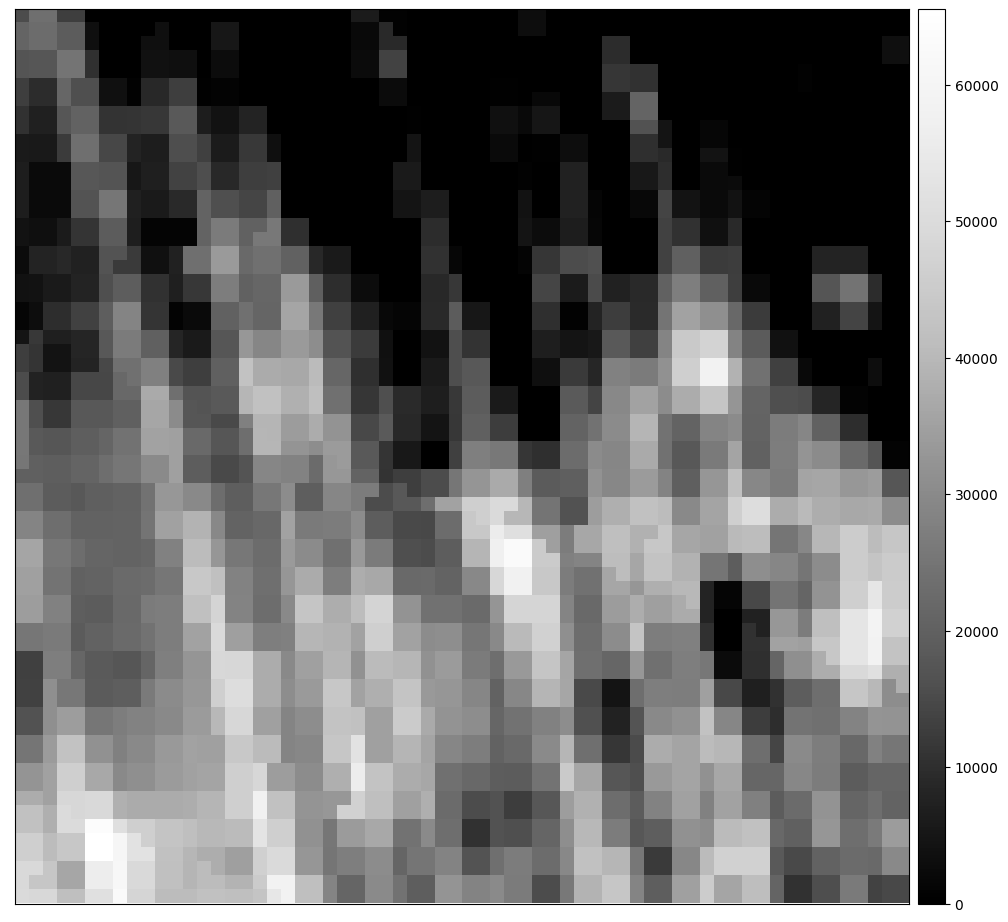

<AxesSubplot: >

In [14]:
with rasterio.open('data/dataset/train_data/images/plume/20230223_methane_mixing_ratio_id_6675.tif') as src:
    img = src.read(1)
ep.plot_bands(img)

In [16]:
image_data = []
plume_labels = []

# Loop through the metadata and load images
for index, row in meta_df.iterrows():
    image_path = row['path']
    plume_label = row['plume']

    # Read the TIFF image using rasterio
    try:
        with rasterio.open(image_path) as src:
            image = src.read(1)  # Assuming single-band image, adjust if necessary
            # You may want to resize or preprocess the image here if necessary

        # Append the image data and plume label to their respective lists
        image_data.append(image)
        plume_labels.append(plume_label)
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

# Convert the lists into NumPy arrays
image_data = np.array(image_data)
plume_labels = np.array(plume_labels)

In [17]:
plume_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
image_data

array([[[15373, 23745, 23745, ...,     0,     0,     0],
        [21083, 22849, 22849, ...,     0,     0,     0],
        [21083, 22849, 22849, ...,     0,  3348,  3348],
        ...,
        [49287, 49287, 43637, ..., 22215, 29933, 29933],
        [49287, 43637, 43637, ..., 13711, 14626, 14626],
        [49834, 48903, 48903, ..., 13711, 14626, 14626]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [ 6386, 11516,  1537, ...,     0,     0,     0],
        [ 6386, 11516,  1537, ...,     0,     0,     0],
        ...,
        [ 3878,  6976,  6548, ...,     0,     0,     0],
        [ 3878,  6976,  6548, ...,     0,     0,     0],
        [ 4225,     0,  4100, ...,     0,     0,     0]],

       [[14118,  9487,  9487, ..., 25601, 22138, 22138],
        [16914,  5666,  5666, ..., 30095, 26363, 26363],
        [16914,  5666,  5666, ..., 30095, 26363, 26363],
        ...,
        [14918, 14918, 16676, ..., 18546,     0,     0],
        [14918, 14918, 16676, ..., 18546,    

In [19]:
min_val = image_data.min()
max_val = image_data.max()

# Normalize the image data
normalized_image_data = (image_data - min_val) / (max_val - min_val)
normalized_image_data

array([[[0.23457694, 0.36232547, 0.36232547, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.05108721, 0.05108721],
        ...,
        [0.75207141, 0.75207141, 0.66585794, ..., 0.33897917,
         0.4567483 , 0.4567483 ],
        [0.75207141, 0.66585794, 0.66585794, ..., 0.20921645,
         0.22317845, 0.22317845],
        [0.7604181 , 0.74621195, 0.74621195, ..., 0.20921645,
         0.22317845, 0.22317845]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.05917449, 0.10644694, 0.09991608, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [20]:
X = normalized_image_data
y = plume_labels


#X = [np.transpose(image, (1, 2, 0)) for image in X]

#X = np.array(X)
np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,shuffle=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (258, 64, 64)
X_test shape: (172, 64, 64)


In [21]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

# Data Augmentation

In [69]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
X_train = X_train.reshape(-1,64,64,1)
batch_size=64
steps_per_epoch = len(X_train) // batch_size
# Fit the data augmentation generator to your training data
datagen.fit(X_train)

augmented_images = []
augmented_labels = []

# Generate augmented images and labels
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size,shuffle=True):
    augmented_images.append(X_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) >= len(X_train):
        break

X_train_augmented = np.concatenate(augmented_images)
y_train_augmented = np.concatenate(augmented_labels)

y_train_augmented = y_train_augmented.astype(int)

# Model 1(Pilot)

In [82]:
from sklearn import metrics
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [85]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the random seed for reproducibility
tf.random.set_seed(1234)

# Define the CNN model
model = tf.keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output for fully connected layers
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=[tf.keras.metrics.AUC()])

# Print the model summary to view the architecture
model.summary()

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5,           
    restore_best_weights=True)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 128)        

In [86]:
batch_size = 32
epochs = 100
model.fit(X_train_augmented,y_train_augmented, epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
334/334 [==============================] - 37s 100ms/step - loss: 0.4728 - auc: 0.8560 - val_loss: 0.2680 - val_auc: 0.9586
Epoch 2/100
334/334 [==============================] - 32s 96ms/step - loss: 0.2089 - auc: 0.9729 - val_loss: 0.1444 - val_auc: 0.9911
Epoch 3/100
334/334 [==============================] - 32s 96ms/step - loss: 0.0943 - auc: 0.9939 - val_loss: 0.0568 - val_auc: 0.9990
Epoch 4/100
334/334 [==============================] - 32s 95ms/step - loss: 0.0461 - auc: 0.9982 - val_loss: 0.0418 - val_auc: 0.9983
Epoch 5/100
334/334 [==============================] - 32s 95ms/step - loss: 0.0380 - auc: 0.9987 - val_loss: 0.0706 - val_auc: 0.9952
Epoch 6/100
334/334 [==============================] - 31s 94ms/step - loss: 0.0297 - auc: 0.9993 - val_loss: 0.0269 - val_auc: 0.9996
Epoch 7/100
334/334 [==============================] - 31s 94ms/step - loss: 0.0283 - auc: 0.9993 - val_loss: 0.0211 - val_auc: 0.9997
Epoch 8/100
334/334 [==============================] -

In [72]:
model.save("model/CNN_First_Model.h5")

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

6/6 [==============================] - 0s 24ms/step


array([[2.2929227e-07],
       [9.9898654e-01],
       [5.7503808e-02],
       [9.9999988e-01],
       [2.1710357e-06],
       [3.6265588e-01],
       [1.0000000e+00],
       [9.9999970e-01],
       [9.9988967e-01],
       [6.7789316e-01],
       [1.6937511e-05],
       [1.0560088e-08],
       [5.0081834e-03],
       [7.8054245e-06],
       [7.5282037e-01],
       [9.9886197e-01],
       [8.1779152e-05],
       [9.8308353e-03],
       [9.9994397e-01],
       [6.9796620e-08],
       [2.6861702e-09],
       [7.2335423e-12],
       [3.3676208e-08],
       [1.0000000e+00],
       [1.2656397e-05],
       [1.4431784e-02],
       [1.0000000e+00],
       [8.2363700e-13],
       [1.6582788e-04],
       [1.6036596e-11],
       [9.9943066e-01],
       [1.7120701e-10],
       [1.0656968e-06],
       [1.1139044e-02],
       [1.0369749e-16],
       [9.9999672e-01],
       [9.9999094e-01],
       [8.1162443e-24],
       [6.5521221e-05],
       [3.5080930e-07],
       [3.1932274e-18],
       [9.999772

## Eval Metrics

In [88]:
# Apply threshold to obtain binary predictions (0 or 1)
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions)

0.9366847826086955

In [99]:
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 85.47%


(array([82.,  0.,  0.,  4.,  1.,  0.,  3.,  2.,  3., 77.]),
 array([8.11624433e-24, 1.00000001e-01, 2.00000003e-01, 3.00000012e-01,
        4.00000006e-01, 5.00000000e-01, 6.00000024e-01, 6.99999988e-01,
        8.00000012e-01, 8.99999976e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

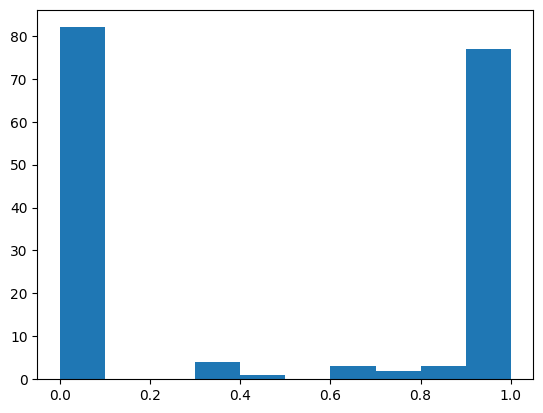

In [100]:
plt.hist(predictions.squeeze())

In [101]:
confusion_matrix(y_test, binary_predictions).ravel()

array([71,  9, 16, 76], dtype=int64)

In [102]:
tn,fp,fn,tp = confusion_matrix(y_test, binary_predictions).ravel()

In [104]:
class_report = classification_report(y_test, binary_predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        80
           1       0.89      0.83      0.86        92

    accuracy                           0.85       172
   macro avg       0.86      0.86      0.85       172
weighted avg       0.86      0.85      0.85       172



In [105]:
pd.Series(binary_predictions.squeeze()).value_counts()

0    87
1    85
dtype: int64

# Test Datasets

## Loading

In [106]:
# Specify the path to the folder containing TIFF files
folder_path = "data/dataset/test_data/images/"

# Use glob to get a list of TIFF files in the folder
tiff_files = glob.glob(folder_path + "/*.tif")

# Create a Pandas Series from the list of file paths
file_series = pd.Series(tiff_files)

# Display the Pandas Series
print(file_series)

0      data/dataset/test_data/images\20230101_methane...
1      data/dataset/test_data/images\20230101_methane...
2      data/dataset/test_data/images\20230101_methane...
3      data/dataset/test_data/images\20230103_methane...
4      data/dataset/test_data/images\20230103_methane...
                             ...                        
103    data/dataset/test_data/images\20230404_methane...
104    data/dataset/test_data/images\20230404_methane...
105    data/dataset/test_data/images\20230405_methane...
106    data/dataset/test_data/images\20230405_methane...
107    data/dataset/test_data/images\20230406_methane...
Length: 108, dtype: object


In [107]:
t_df = pd.read_csv('data/dataset/test_data/metadata.csv')
t_df.head()

,date,id_coord,lat,lon,coord_x,coord_y
0,20230213,id_6148,23.437500,90.645000,54,10
1,20230206,id_3348,33.513333,-87.203333,31,55
2,20230121,id_3733,26.424286,80.284286,33,44
3,20230204,id_5491,30.246667,71.483333,59,59
4,20230130,id_4287,23.763333,86.396667,46,46


In [108]:
# Replace forward slashes with backslashes in the Pandas Series
file_series = file_series.str.replace('//', '/')

# Display the modified Pandas Series
print(file_series)

0      data/dataset/test_data/images\20230101_methane...
1      data/dataset/test_data/images\20230101_methane...
2      data/dataset/test_data/images\20230101_methane...
3      data/dataset/test_data/images\20230103_methane...
4      data/dataset/test_data/images\20230103_methane...
                             ...                        
103    data/dataset/test_data/images\20230404_methane...
104    data/dataset/test_data/images\20230404_methane...
105    data/dataset/test_data/images\20230405_methane...
106    data/dataset/test_data/images\20230405_methane...
107    data/dataset/test_data/images\20230406_methane...
Length: 108, dtype: object


In [109]:
file_series

0      data/dataset/test_data/images\20230101_methane...
1      data/dataset/test_data/images\20230101_methane...
2      data/dataset/test_data/images\20230101_methane...
3      data/dataset/test_data/images\20230103_methane...
4      data/dataset/test_data/images\20230103_methane...
                             ...                        
103    data/dataset/test_data/images\20230404_methane...
104    data/dataset/test_data/images\20230404_methane...
105    data/dataset/test_data/images\20230405_methane...
106    data/dataset/test_data/images\20230405_methane...
107    data/dataset/test_data/images\20230406_methane...
Length: 108, dtype: object

In [110]:
file_series = pd.Series(file_series)

In [111]:
import rasterio
import numpy as np

image_data_test = []

# Loop through the file paths and load images
for image_path in file_series:
    # Read the TIFF image using rasterio
    try:
        with rasterio.open(image_path) as src:
            image = src.read(1)  # Assuming single-band image, adjust if necessary
            # You may want to resize or preprocess the image here if necessary

        # Append the image data to the list
        image_data_test.append(image)
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

# Convert the list of images into a NumPy array
image_data_test = np.array(image_data_test)

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


## Transformations

In [112]:
min_val = image_data_test.min()
max_val = image_data_test.max()

# Normalize the image data
normalized_image_data_test = (image_data_test - min_val) / (max_val - min_val)
normalized_image_data_test

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.45293355,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.45293355,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.38403906, 0.44130617, 0.44130617, ..., 0.        ,
         0.        , 0.        ],
        [0.345449  , 0.36951247, 0.36951247, ..., 0.        ,
         0.        , 0.        ],
        [0.345449  , 0.36951247, 0.36951247, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.20677501,
         0.20677501, 0.11776913],
        [0. 

In [113]:
normalized_image_data_test.shape

(108, 64, 64)

## Predictions

In [121]:
predictions_test.shape

(108, 1)

In [114]:
# Make predictions on the test dataset
predictions_test = model.predict(normalized_image_data_test)
predictions_test

4/4 [==============================] - 0s 18ms/step


array([[1.1035744e-08],
       [8.6040282e-01],
       [2.3464318e-03],
       [9.9953067e-01],
       [9.9999166e-01],
       [9.3746826e-02],
       [9.9963170e-01],
       [6.7812513e-15],
       [9.9999142e-01],
       [7.5517279e-01],
       [9.9999994e-01],
       [9.9997264e-01],
       [9.9999869e-01],
       [9.9994493e-01],
       [9.9999851e-01],
       [9.9519461e-01],
       [5.3467885e-02],
       [3.7318285e-15],
       [1.0000000e+00],
       [3.3676208e-08],
       [9.9820858e-01],
       [2.4490536e-09],
       [1.0000000e+00],
       [6.1439327e-28],
       [3.0450875e-14],
       [6.2238394e-25],
       [4.8821259e-04],
       [9.9996829e-01],
       [1.1024952e-06],
       [1.7046292e-05],
       [1.0000000e+00],
       [3.0424908e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.8060279e-04],
       [2.5777431e-04],
       [1.3547535e-05],
       [9.5749749e-03],
       [3.9217510e-05],
       [2.6001832e-22],
       [6.0743414e-04],
       [9.999089

In [123]:
import csv
# Your NumPy array
data = np.array(predictions_test)

# Define the file path for saving the CSV file
csv_path = 'output_test.csv'

# Save the array as a CSV file
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

In [119]:
# Apply threshold to obtain binary predictions (0 or 1)
threshold = 0.5
binary_predictions_test = (predictions_test >= threshold).astype(int)

In [120]:
pd.Series(binary_predictions_test.squeeze()).value_counts()

0    56
1    52
dtype: int64

# Model 2(Pre-trained)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers.experimental.preprocessing import Resizing

# Set the random seed for reproducibility
tf.random.set_seed(1234)

# Create the MobileNetV2 model with the correct input shape
mobilenetv2_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
mobilenetv2_model.trainable = False  # Freeze the pretrained MobileNetV2 layers

# Define the CNN model
model2 = tf.keras.Sequential([
    Resizing(64, 64, input_shape=(64, 64, 1)),  # Resize input images to (64, 64) without rescaling
    layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x)),  # Convert grayscale to RGB
    mobilenetv2_model,  # Add the MobileNetV2 model as a layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Print the model summary to view the architecture
model2.summary()

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5,           
    restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 64, 64, 1)         0         
                                                                 
 lambda (Lambda)             (None, 64, 64, 3)         0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               655488    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

In [43]:
batch_size = 32
epochs = 100
model2.fit(X_train_augmented,y_train_augmented, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[early_stopping])

Epoch 1/100
376/376 [==============================] - 36s 83ms/step - loss: 0.4985 - accuracy: 0.7678 - val_loss: 0.2913 - val_accuracy: 0.8794
Epoch 2/100
376/376 [==============================] - 27s 73ms/step - loss: 0.3342 - accuracy: 0.8555 - val_loss: 0.2306 - val_accuracy: 0.9079
Epoch 3/100
376/376 [==============================] - 26s 70ms/step - loss: 0.2632 - accuracy: 0.8910 - val_loss: 0.2172 - val_accuracy: 0.9191
Epoch 4/100
376/376 [==============================] - 25s 68ms/step - loss: 0.2236 - accuracy: 0.9079 - val_loss: 0.2006 - val_accuracy: 0.9341
Epoch 5/100
376/376 [==============================] - 26s 68ms/step - loss: 0.1972 - accuracy: 0.9203 - val_loss: 0.1839 - val_accuracy: 0.9386
Epoch 6/100
376/376 [==============================] - 26s 68ms/step - loss: 0.1795 - accuracy: 0.9257 - val_loss: 0.1662 - val_accuracy: 0.9378
Epoch 7/100
376/376 [==============================] - 27s 71ms/step - loss: 0.1713 - accuracy: 0.9301 - val_loss: 0.1526 - val_ac

In [44]:
# Make predictions on the test dataset
predictions2 = model2.predict(X_test)
predictions2

6/6 [==============================] - 1s 51ms/step


array([[1.7245313e-04],
       [5.2354358e-02],
       [8.1176275e-01],
       [9.9999994e-01],
       [9.9994904e-01],
       [5.4276221e-05],
       [9.9999917e-01],
       [7.7475947e-01],
       [9.9115002e-01],
       [9.9966455e-01],
       [1.9564349e-03],
       [1.4803109e-01],
       [8.6577952e-01],
       [1.9834926e-02],
       [1.3746515e-01],
       [1.1252341e-01],
       [3.0020952e-01],
       [8.3177316e-01],
       [1.8485196e-01],
       [5.0101116e-02],
       [7.5935991e-03],
       [1.5088619e-04],
       [1.1477867e-02],
       [9.6897721e-01],
       [2.1942696e-01],
       [9.9394697e-01],
       [9.7280943e-01],
       [2.6475189e-12],
       [3.7065125e-01],
       [8.3959782e-01],
       [2.8477836e-02],
       [6.1293804e-06],
       [5.0418466e-02],
       [5.9656082e-03],
       [1.9283958e-02],
       [9.9933553e-01],
       [5.9970289e-01],
       [4.0533319e-09],
       [1.6566401e-02],
       [7.6097786e-01],
       [1.4899983e-03],
       [9.972012

## Eval Metrics

In [45]:
# Apply threshold to obtain binary predictions (0 or 1)
threshold = 0.5
binary_predictions2 = (predictions2 >= threshold).astype(int)

In [46]:
class_report2 = classification_report(y_test, binary_predictions2)
print("Classification Report:")
print(class_report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        80
           1       0.81      0.73      0.77        92

    accuracy                           0.76       172
   macro avg       0.76      0.76      0.76       172
weighted avg       0.77      0.76      0.76       172



In [47]:
# Calculate accuracy using one-hot encoded labels
accuracy2 = accuracy_score(y_test, binary_predictions2)
print(f"Accuracy: {accuracy2*100:.2f}%")

Accuracy: 76.16%


# Gaussian Blurring and Histogram Equalization 

In [22]:
min_val = image_data.min()
max_val = image_data.max()

# Normalize the image data
normalized_image_data = (image_data - min_val) / (max_val - min_val)
normalized_image_data

array([[[0.23457694, 0.36232547, 0.36232547, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.05108721, 0.05108721],
        ...,
        [0.75207141, 0.75207141, 0.66585794, ..., 0.33897917,
         0.4567483 , 0.4567483 ],
        [0.75207141, 0.66585794, 0.66585794, ..., 0.20921645,
         0.22317845, 0.22317845],
        [0.7604181 , 0.74621195, 0.74621195, ..., 0.20921645,
         0.22317845, 0.22317845]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.05917449, 0.10644694, 0.09991608, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [23]:
X = normalized_image_data
y = plume_labels


#X = [np.transpose(image, (1, 2, 0)) for image in X]

#X = np.array(X)
np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,shuffle=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (258, 64, 64)
X_test shape: (172, 64, 64)


In [37]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
X_train = X_train.reshape(-1,64,64,1)
batch_size=64
steps_per_epoch = len(X_train) // batch_size
# Fit the data augmentation generator to your training data
datagen.fit(X_train)

augmented_images = []
augmented_labels = []

# Generate augmented images and labels
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size,shuffle=True):
    augmented_images.append(X_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) >= len(X_train):
        break

X_train_augmented = np.concatenate(augmented_images)
y_train_augmented = np.concatenate(augmented_labels)

y_train_augmented = y_train_augmented.astype(int)

In [25]:
blurred_X_train = []
blurred_y_train = []

# Loop through the loaded images
for image, label in zip(X_train_augmented, y_train_augmented):
    if image.dtype != np.uint8:
        # Convert to 8-bit (if not already)
        image = (image / np.max(image) * 255).astype(np.uint8)
    
    # Check if it's not already grayscale (single channel)
    if len(image.shape) > 2 and image.shape[2] != 1:
        # Convert to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blurring
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust kernel size as needed
    blurred_X_train.append(blurred_image)
    blurred_y_train.append(label)

# Convert the lists of preprocessed images into NumPy arrays
blurred_X_train = np.array(blurred_X_train)
blurred_y_train = np.array(blurred_y_train)

In [30]:
X_train_augmented = np.concatenate(blurred_X_train)

In [38]:
y_train_augmented.shape

(13350,)

In [39]:
X_train_augmented.shape

(13350, 64, 64, 1)

In [52]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the random seed for reproducibility
tf.random.set_seed(1234)

# Define the CNN model
model = tf.keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output for fully connected layers
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Print the model summary to view the architecture
model.summary()

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5,           
    restore_best_weights=True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

In [53]:
batch_size = 32
epochs = 100
model.fit(blurred_images,y_train_augmented, epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
334/334 [==============================] - 24s 69ms/step - loss: 0.8083 - accuracy: 0.6045 - val_loss: 0.5174 - val_accuracy: 0.7633
Epoch 2/100
334/334 [==============================] - 23s 70ms/step - loss: 0.5088 - accuracy: 0.7569 - val_loss: 0.4210 - val_accuracy: 0.8101
Epoch 3/100
334/334 [==============================] - 24s 71ms/step - loss: 0.3762 - accuracy: 0.8373 - val_loss: 0.2762 - val_accuracy: 0.8921
Epoch 4/100
334/334 [==============================] - 24s 71ms/step - loss: 0.2843 - accuracy: 0.8890 - val_loss: 0.1802 - val_accuracy: 0.9285
Epoch 5/100
334/334 [==============================] - 23s 70ms/step - loss: 0.2123 - accuracy: 0.9180 - val_loss: 0.1555 - val_accuracy: 0.9375
Epoch 6/100
334/334 [==============================] - 24s 72ms/step - loss: 0.1590 - accuracy: 0.9417 - val_loss: 0.1357 - val_accuracy: 0.9476
Epoch 7/100
334/334 [==============================] - 24s 72ms/step - loss: 0.1167 - accuracy: 0.9547 - val_loss: 0.0938 - val_ac

In [54]:
# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

6/6 [==============================] - 0s 16ms/step


array([[7.2388834e-01],
       [2.0866580e-02],
       [1.8047015e-01],
       [1.4396644e-01],
       [1.4056118e-01],
       [1.9980338e-01],
       [2.4207735e-02],
       [1.0758678e-01],
       [4.2469326e-01],
       [3.4518036e-01],
       [9.9744171e-01],
       [7.5738484e-01],
       [9.9992275e-01],
       [8.1953859e-01],
       [4.6136833e-04],
       [2.2330556e-02],
       [9.9638540e-01],
       [9.8570532e-01],
       [5.6200129e-01],
       [3.9668536e-01],
       [1.1325398e-01],
       [1.4137918e-02],
       [9.9475086e-01],
       [1.2933786e-01],
       [1.3016126e-01],
       [6.2132078e-01],
       [3.0744722e-01],
       [2.1422084e-01],
       [3.4065971e-01],
       [8.7502110e-04],
       [1.1761299e-02],
       [3.3960198e-03],
       [3.2241531e-02],
       [9.9669671e-01],
       [1.3016450e-01],
       [6.7152190e-01],
       [1.4821310e-01],
       [2.3809543e-02],
       [1.9781928e-01],
       [2.7970308e-01],
       [7.2051785e-03],
       [4.677858

## Eval Metrics

In [55]:
# Apply threshold to obtain binary predictions (0 or 1)
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

In [56]:
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 48.84%


(array([57., 22.,  8.,  9., 12.,  7.,  6., 10.,  4., 37.]),
 array([9.54787247e-05, 1.00084342e-01, 2.00073197e-01, 3.00062060e-01,
        4.00050908e-01, 5.00039756e-01, 6.00028634e-01, 7.00017512e-01,
        8.00006390e-01, 8.99995208e-01, 9.99984086e-01]),
 <BarContainer object of 10 artists>)

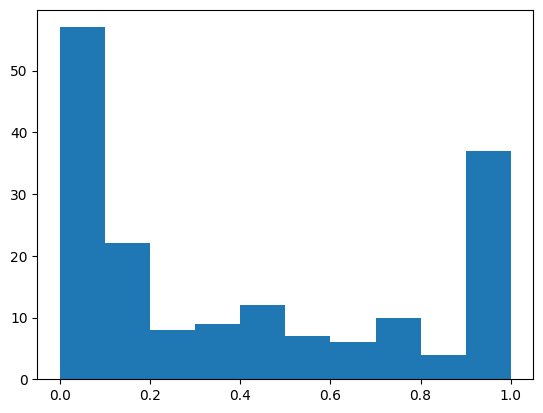

In [57]:
plt.hist(predictions.squeeze())

In [58]:
class_report = classification_report(y_test, binary_predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.62      0.53        80
           1       0.53      0.37      0.44        92

    accuracy                           0.49       172
   macro avg       0.50      0.50      0.48       172
weighted avg       0.50      0.49      0.48       172

